## Preparing to Analyze and Importing Automobile Fuel Efficiencies

In [5]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
ls

fuel_efficiency_python.ipynb*


In [9]:
vehicles = pd.read_csv("../data/vehicles.csv")
vehicles.head

/Users/nathankiner/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (22,23,70,71,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method DataFrame.head of        barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.689436           0          0          0      19        0        0   
1      29.950562           0          0          0       9        0        0   
2      12.195570           0          0          0      23        0        0   
3      29.950562           0          0          0      10        0        0   
4      17.337486           0          0          0      17        0        0   
5      14.964294           0          0          0      21        0        0   
6      13.184400           0          0          0      22        0        0   
7      13.733750           0          0          0      23        0        0   
8      12.657024           0          0          0      23        0        0   
9      13.184400           0          0          0      23        0        0   
10     12.657024           0          0          0      23        0        0   
11     1

In [10]:
column_names = vehicles.columns.values

column_names[[22, 23, 70, 71, 72, 73]]

array(['cylinders', 'displ', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode'], dtype=object)

## Exploring and Describing the Fuel Efficiency Data

In [11]:
len(vehicles)

34287

In [12]:
print len(vehicles.columns)
print(vehicles.columns)

74
Index([u'barrels08', u'barrelsA08', u'charge120', u'charge240', u'city08',
       u'city08U', u'cityA08', u'cityA08U', u'cityCD', u'cityE', u'cityUF',
       u'co2', u'co2A', u'co2TailpipeAGpm', u'co2TailpipeGpm', u'comb08',
       u'comb08U', u'combA08', u'combA08U', u'combE', u'combinedCD',
       u'combinedUF', u'cylinders', u'displ', u'drive', u'engId', u'eng_dscr',
       u'feScore', u'fuelCost08', u'fuelCostA08', u'fuelType', u'fuelType1',
       u'ghgScore', u'ghgScoreA', u'highway08', u'highway08U', u'highwayA08',
       u'highwayA08U', u'highwayCD', u'highwayE', u'highwayUF', u'hlv', u'hpv',
       u'id', u'lv2', u'lv4', u'make', u'model', u'mpgData', u'phevBlended',
       u'pv2', u'pv4', u'range', u'rangeCity', u'rangeCityA', u'rangeHwy',
       u'rangeHwyA', u'trany', u'UCity', u'UCityA', u'UHighway', u'UHighwayA',
       u'VClass', u'year', u'youSaveSpend', u'guzzler', u'trans_dscr',
       u'tCharger', u'sCharger', u'atvType', u'fuelType2', u'rangeA',
       u'evMotor'

In [13]:
len(pd.unique(vehicles.year))

31

In [14]:
min(vehicles.year)

1984

In [15]:
max(vehicles['year'])

2014

In [16]:
pd.value_counts(vehicles.fuelType1)

Regular Gasoline     24587
Premium Gasoline      8521
Diesel                1025
Natural Gas             57
Electricity             56
Midgrade Gasoline       41
Name: fuelType1, dtype: int64

In [17]:
pd.value_counts(vehicles.trany)

Automatic 4-spd                     11029
Manual 5-spd                         8213
Automatic 3-spd                      3151
Automatic 5-spd                      2149
Manual 6-spd                         2009
Automatic (S6)                       1877
Manual 4-spd                         1483
Automatic 6-spd                      1093
Automatic (S5)                        813
Automatic (variable gear ratios)      534
Automatic 7-spd                       493
Automatic (S8)                        366
Automatic (S4)                        231
Automatic (S7)                        182
Auto(AM-S7)                            84
Auto(AV-S6)                            80
Automatic 8-spd                        78
Manual 3-spd                           77
Auto(AM6)                              68
Auto(AM7)                              58
Automatic (A1)                         41
Auto(AM-S6)                            38
Manual 7-spd                           24
Auto(AV-S7)                       

In [18]:
vehicles["trany2"] = vehicles.trany.str[0]
pd.value_counts(vehicles.trany2)

A    22451
M    11825
Name: trany2, dtype: int64

## Analyzing Automobile Fuel Efficiency Over Time

In [19]:
grouped = vehicles.groupby("year")
averaged = grouped['comb08','highway08','city08'].agg([np.mean])
averaged['year'] = averaged.index
print(averaged)

         comb08  highway08     city08  year
           mean       mean       mean      
year                                       
1984  19.881874  23.075356  17.982688  1984
1985  19.808348  23.042328  17.878307  1985
1986  19.550413  22.699174  17.665289  1986
1987  19.228549  22.445068  17.310345  1987
1988  19.328319  22.702655  17.333628  1988
1989  19.125759  22.465742  17.143972  1989
1990  19.000928  22.337662  17.033395  1990
1991  18.825972  22.253534  16.848940  1991
1992  18.862623  22.439786  16.805531  1992
1993  19.104300  22.780421  16.998170  1993
1994  19.012220  22.725051  16.918534  1994
1995  18.797311  22.671148  16.569804  1995
1996  19.584735  23.569211  17.289780  1996
1997  19.429134  23.451444  17.135171  1997
1998  19.518473  23.546798  17.113300  1998
1999  19.611502  23.552817  17.272300  1999
2000  19.526190  23.414286  17.221429  2000
2001  19.479693  23.328211  17.275521  2001
2002  19.168205  23.030769  16.893333  2002
2003  19.000958  22.836207  16.7

In [20]:
averaged.columns = ['comb08_mean','highway08_mean', 'city08_mean','year']
print(averaged.columns)

Index([u'comb08_mean', u'highway08_mean', u'city08_mean', u'year'], dtype='object')


/Users/nathankiner/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


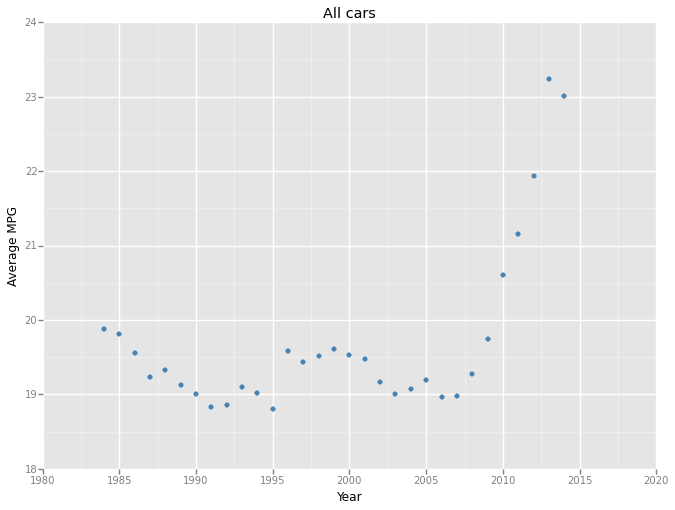

<ggplot: (281088833)>


In [21]:
print ggplot(averaged, aes('year', 'comb08_mean')) + geom_point(colour='steelblue') + xlab("Year") + ylab("Average MPG") + ggtitle("All cars")


In [22]:
pd.unique(vehicles.atvType)

array([nan, 'Diesel', 'Hybrid', 'Bifuel (CNG)', 'CNG', 'FFV', 'EV',
       'Bifuel (LPG)', 'Plug-in Hybrid'], dtype=object)

In [23]:
criteria1 = vehicles.fuelType1.isin(["Regular Gasoline", "Premium Gasoline", "Midgrade Gasoline"])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != "Hybrid"
vehicles_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]
len(vehicles_non_hybrid)

31661

In [24]:
grouped = vehicles_non_hybrid.groupby(['year'])
averaged = grouped['comb08'].agg([np.mean])
averaged['year']  = averaged.index
print(averaged)

           mean  year
year                 
1984  19.121622  1984
1985  19.394686  1985
1986  19.320457  1986
1987  19.164568  1987
1988  19.367607  1988
1989  19.141964  1989
1990  19.031459  1990
1991  18.838060  1991
1992  18.861566  1992
1993  19.137383  1993
1994  19.092632  1994
1995  18.872591  1995
1996  19.530962  1996
1997  19.368000  1997
1998  19.329545  1998
1999  19.239759  1999
2000  19.169345  2000
2001  19.075058  2001
2002  18.950270  2002
2003  18.761711  2003
2004  18.967339  2004
2005  19.005510  2005
2006  18.786398  2006
2007  18.987512  2007
2008  19.191781  2008
2009  19.738095  2009
2010  20.466736  2010
2011  20.961755  2011
2012  21.496767  2012
2013  22.335118  2013
2014  22.248027  2014


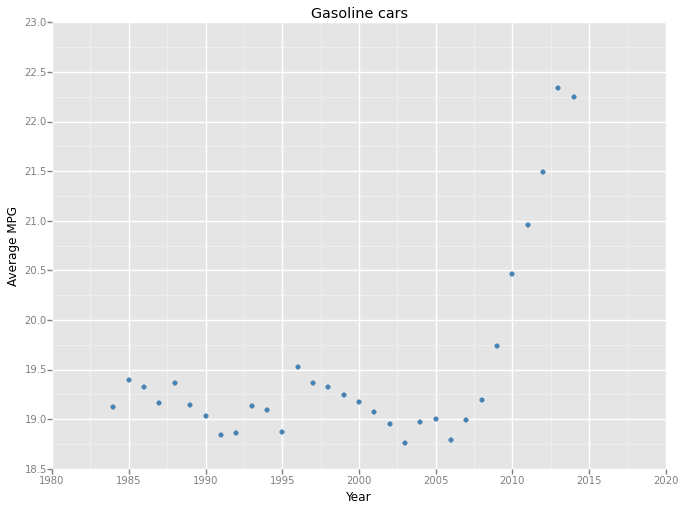

<ggplot: (282620517)>


In [25]:
print ggplot(averaged, aes('year', 'mean')) + geom_point(colour='steelblue') + xlab("Year") + ylab("Average MPG") + ggtitle("Gasoline cars")


In [26]:
pd.unique(vehicles_non_hybrid.displ)

array([2.0, 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4.0, 5.0, 3.3, 3.1, 3.8,
       4.6, 3.4, 3.0, 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8.0, 6.0, 3.6, 5.4,
       5.6, 1.0, 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 4.4, 3.7, 6.7,
       4.8, 1.7, 6.2, 8.3, 1.4, 6.1, 7.0, 8.4, '3.3', '3.8', '3.5', '4.5',
       '5.0', '4.6', '4.2', '5.5', '6.0', '3.0', '1.5', '2.0', '2.8',
       '2.4', '2.7', '2.3', '3.2', '2.5', '4.0', '4.7', '5.4', '5.7',
       '4.3', '3.7', '4.8', '2.2', '1.8', '6.5', '3.6', '6.1', '6.2',
       '1.6', '1.0', '4.4', '5.9', '1.3', '6.7', '5.6', '3.4', '7.0',
       '5.2', '3.9', '5.3', '4.9', '2.9', '5.8', '3.1', '8.4', '1.1',
       '2.1', '2.6', '1.4', '6.8', '1.7', '4.1', '1.9', '8.0', '6.3', nan,
       '6.6', '6.4', '1.2', '7.4'], dtype=object)

In [27]:
criteria = vehicles_non_hybrid.displ.notnull()


In [28]:
vehicles_non_hybrid = vehicles_non_hybrid[criteria]


In [29]:
vehicles_non_hybrid.loc[:,'displ'] = vehicles_non_hybrid.displ.astype('float')

/Users/nathankiner/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
criteria = vehicles_non_hybrid.comb08.notnull()


In [31]:
len(criteria), len(vehicles_non_hybrid), sum(criteria)

(31659, 31659, 31659)

In [32]:
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
print len(vehicles_non_hybrid)
vehicles_non_hybrid.comb08 = vehicles_non_hybrid.comb08.astype('float')


31659


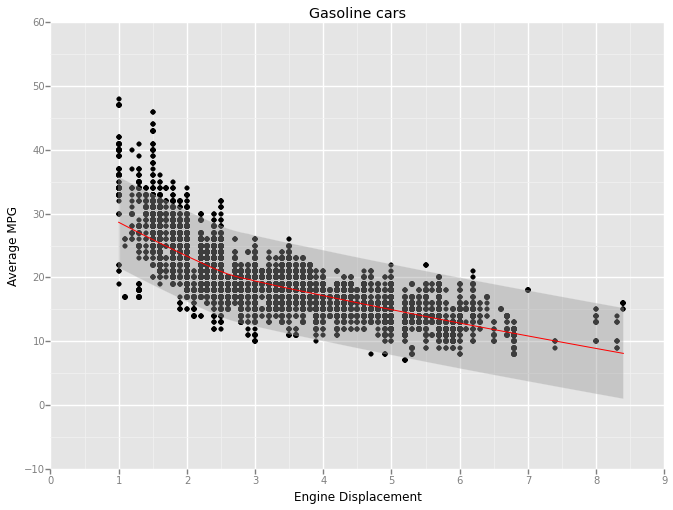

<ggplot: (280405929)>

In [42]:
#plt.scatter(vehicles_non_hybrid.displ.astype('float'), vehicles_non_hybrid.comb08.astype('float'), alpha=0.5)
#plt.show()

ggplot(aes(x = 'displ', y = 'comb08'), data = vehicles_non_hybrid,) + geom_point() + stat_smooth(colour="red", se=True) + xlab("Engine Displacement") + ylab("Average MPG") + ggtitle("Gasoline cars")


In [34]:
grouped_by_year = vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year = grouped_by_year['displ', 'comb08'].agg([np.mean])

In [35]:
print avg_grouped_by_year

         displ     comb08
          mean       mean
year                     
1984  3.068449  19.121622
1985  3.075990  19.389358
1986  3.126514  19.320457
1987  3.096474  19.164568
1988  3.113558  19.367607
1989  3.133393  19.141964
1990  3.145472  19.031459
1991  3.178957  18.838060
1992  3.224954  18.861566
1993  3.193832  19.137383
1994  3.233053  19.092632
1995  3.375161  18.872591
1996  3.205929  19.530962
1997  3.206267  19.368000
1998  3.197348  19.329545
1999  3.214819  19.239759
2000  3.227070  19.169345
2001  3.216051  19.075058
2002  3.263568  18.950270
2003  3.340428  18.761711
2004  3.349568  18.967339
2005  3.384022  19.005510
2006  3.534387  18.786398
2007  3.569452  18.987512
2008  3.587032  19.191781
2009  3.522095  19.738095
2010  3.413306  20.466736
2011  3.376828  20.961755
2012  3.350862  21.496767
2013  3.219807  22.335118
2014  3.312176  22.248027


    year variable_0 variable_1      value
0   1984      displ       mean   3.068449
1   1985      displ       mean   3.075990
2   1986      displ       mean   3.126514
3   1987      displ       mean   3.096474
4   1988      displ       mean   3.113558
5   1989      displ       mean   3.133393
6   1990      displ       mean   3.145472
7   1991      displ       mean   3.178957
8   1992      displ       mean   3.224954
9   1993      displ       mean   3.193832
10  1994      displ       mean   3.233053
11  1995      displ       mean   3.375161
12  1996      displ       mean   3.205929
13  1997      displ       mean   3.206267
14  1998      displ       mean   3.197348
15  1999      displ       mean   3.214819
16  2000      displ       mean   3.227070
17  2001      displ       mean   3.216051
18  2002      displ       mean   3.263568
19  2003      displ       mean   3.340428
20  2004      displ       mean   3.349568
21  2005      displ       mean   3.384022
22  2006      displ       mean   3

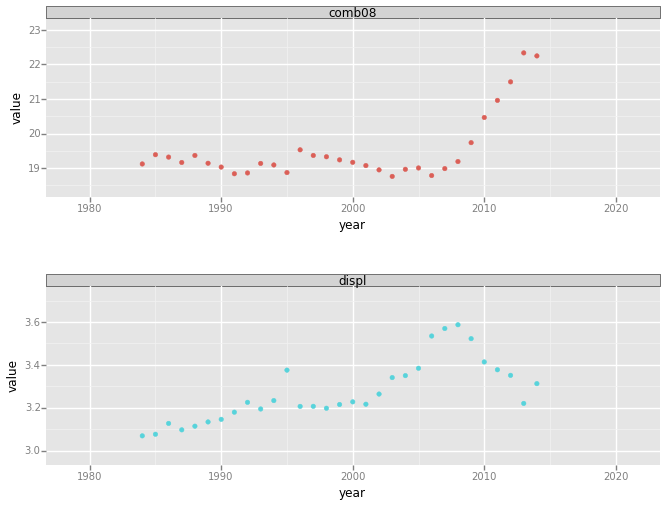

<ggplot: (280681989)>

In [41]:
avg_grouped_by_year['year'] = avg_grouped_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year, id_vars='year')
print melted_avg_grouped_by_year

p = ggplot(aes(x='year', y='value', color = 'variable_0'), data=melted_avg_grouped_by_year)
p + geom_point() + facet_wrap("variable_0")
    #stat_smooth(colour="red", se=True, method='lm') + \

## Investigating the Makes and Models of Automobiles

In [37]:
pd.unique(vehicles_non_hybrid.cylinders)

array([4.0, 12.0, 8.0, 6.0, 5.0, 10.0, 2.0, 3.0, 16.0, '6', '8', '12', '4',
       '3', '5', '2', '10', '16', nan], dtype=object)

In [38]:
vehicles_non_hybrid.cylinders = vehicles_non_hybrid.cylinders.astype('float')
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [39]:
vehicles_non_hybrid_4 = vehicles_non_hybrid[(vehicles_non_hybrid.cylinders == 4.0)]
len(vehicles_non_hybrid_4)
vehicles_non_hybrid_4.make

0        Alfa Romeo
2             Dodge
4            Subaru
5            Subaru
6            Subaru
7            Toyota
8            Toyota
9            Toyota
10           Toyota
11       Volkswagen
12       Volkswagen
13       Volkswagen
15       Volkswagen
16            Volvo
17            Volvo
23            Buick
35        Chevrolet
48            Dodge
51            Dodge
52            Dodge
53            Dodge
64          Hyundai
65          Hyundai
75            Mazda
76            Mazda
81       Oldsmobile
89         Plymouth
90         Plymouth
92         Plymouth
103          Toyota
            ...    
34249    Mitsubishi
34250    Oldsmobile
34251    Oldsmobile
34252    Oldsmobile
34253    Oldsmobile
34256      Plymouth
34257      Plymouth
34258      Plymouth
34259      Plymouth
34262       Pontiac
34263       Pontiac
34264       Pontiac
34266       Pontiac
34268       Pontiac
34269       Pontiac
34270       Pontiac
34272          Saab
34273          Saab
34274          Saab


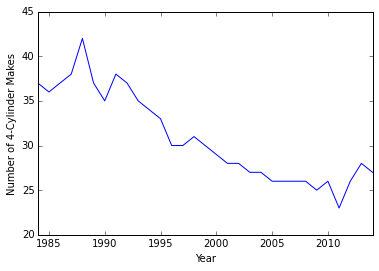

In [40]:
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year']).make.nunique()
fig = grouped_by_year_4_cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')




In [35]:
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year'])

unique_makes = []
for name, group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
    
#test = grouped_by_year_4_cylinder['make']
#print(test.groups)
#print pd.unique(vehicles_non_hybrid_4['make'])

unique_makes = reduce(set.intersection, unique_makes)
 
print(unique_makes)

set(['Dodge', 'Mitsubishi', 'Jeep', 'Chevrolet', 'Nissan', 'Honda', 'Toyota', 'Volkswagen', 'Mazda', 'Subaru', 'Chrysler', 'Ford'])


In [36]:
boolean_mask = []
for index, row in vehicles_non_hybrid_4.iterrows():
    make = row['make']
    boolean_mask.append(make in unique_makes)

df_common_makes = vehicles_non_hybrid_4[boolean_mask]

avgMPG_commonMakes <- ddply(carsCommonMakes4, ~year + make, summarise, avgMPG = mean(comb08))

ggplot(avgMPG_commonMakes, aes(year, avgMPG)) + geom_line() + facet_wrap(~make,  nrow = 3)



In [37]:
df_common_makes_grouped = df_common_makes.groupby(['year','make']).agg(np.mean).reset_index()

In [38]:
ggplot(aes(x='year', y='comb08'), data = df_common_makes_grouped) + geom_line() + facet_wrap('make')
                                    
 

<ggplot: (276871097)>

In [39]:
test = vehicles_non_hybrid_4[vehicles_non_hybrid_4['make'].isin(unique_makes)]
len(test)

7272